<a href="https://colab.research.google.com/github/SojoodAbuAlrub/Predication-of-Cirrhosis-disease-/blob/main/Cirrhosis_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cirrhosis Prediction
Sojood AbuAlrub

# Project Overviwe


Cirrhosis is a liver disease where the liver becomes severely damaged and scarred, making it unable to work properly. It is often caused by long-term conditions such as heavy drinking, viral infections like hepatitis, or fatty liver disease.

As cirrhosis progresses, the liver loses its ability to function, which can lead to symptoms like tiredness, yellow skin (jaundice), swelling in the abdomen, and confusion. In serious cases, cirrhosis can cause liver failure or even liver cancer. Early detection of cirrhosis is important to prevent further damage.

This project focuses on using data to predict cirrhosis in patients, helping doctors diagnose the disease earlier and improve patient care.

# Loading Data and Imports

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
!pip install scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from sklearn import set_config
set_config(transform_output='pandas')
!pip install collinearity

from collinearity import SelectNonCollinear
from sklearn.feature_selection import f_classif

  Preparing metadata (setup.py) ... done
  Created wheel for collinearity: filename=collinearity-0.6.1-py3-none-any.whl size=4443 sha256=c21c996244dc96f9277f538e1666976c8d1f42b21c307dfb65630b6b2911bf8c
  Stored in directory: /root/.cache/pip/wheels/0e/b1/ea/957b5269b023343361d1f3182a3bd03f8a6fbc86ce713ce7cb
Successfully built collinearity


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AXSOSACADEMY (1)/05-IntermediateML/cirrhosis.csv')


## Data Dictionary


1) ID: unique identifier

2) N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986

3) Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)


4) Drug: type of drug D-penicillamine or placebo

5) Age: age in [days]

6) Sex: M (male) or F (female)

7) Ascites: presence of ascites N (No) or Y (Yes)

8) Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)

9) Spiders: presence of spiders N (No) or Y (Yes)

10) Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)

11) Bilirubin: serum bilirubin in [mg/dl]

12) Cholesterol: serum cholesterol in [mg/dl]

13) Albumin: albumin in [gm/dl]

14) Copper: urine copper in [ug/day]

15) Alk_Phos: alkaline phosphatase in [U/liter]

16) SGOT: SGOT in [U/ml]

17) Triglycerides: triglicerides in [mg/dl]

18) Platelets: platelets per cubic [ml/1000]

19) Prothrombin: prothrombin time in seconds [s]

20) Stage: histologic stage of disease (1, 2, 3, or 4)

# Explore and Cleaning Data

In [ ]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi


**Data set Shape**
  - **Rows:** 418,represent Individuals
  - **Columns:** 20, represent risk factors

**Data needed to convert it's type**
    - All Data are set well
    
**The Target is:**
- Status; status of the patient C (censored), CL (censored due to liver tx), or D (death)

In [ ]:
# Dropping ID column
df.drop(['ID'], axis=1, inplace=True)

In [ ]:
# Checking Duplicates
df.duplicated().sum()

0

In [ ]:
# Checking Null values
df.isna().sum()

,0
N_Days,0
Status,0
Drug,106
Age,0
Sex,0
Ascites,106
Hepatomegaly,106
Spiders,106
Edema,0
Bilirubin,0


<Axes: >

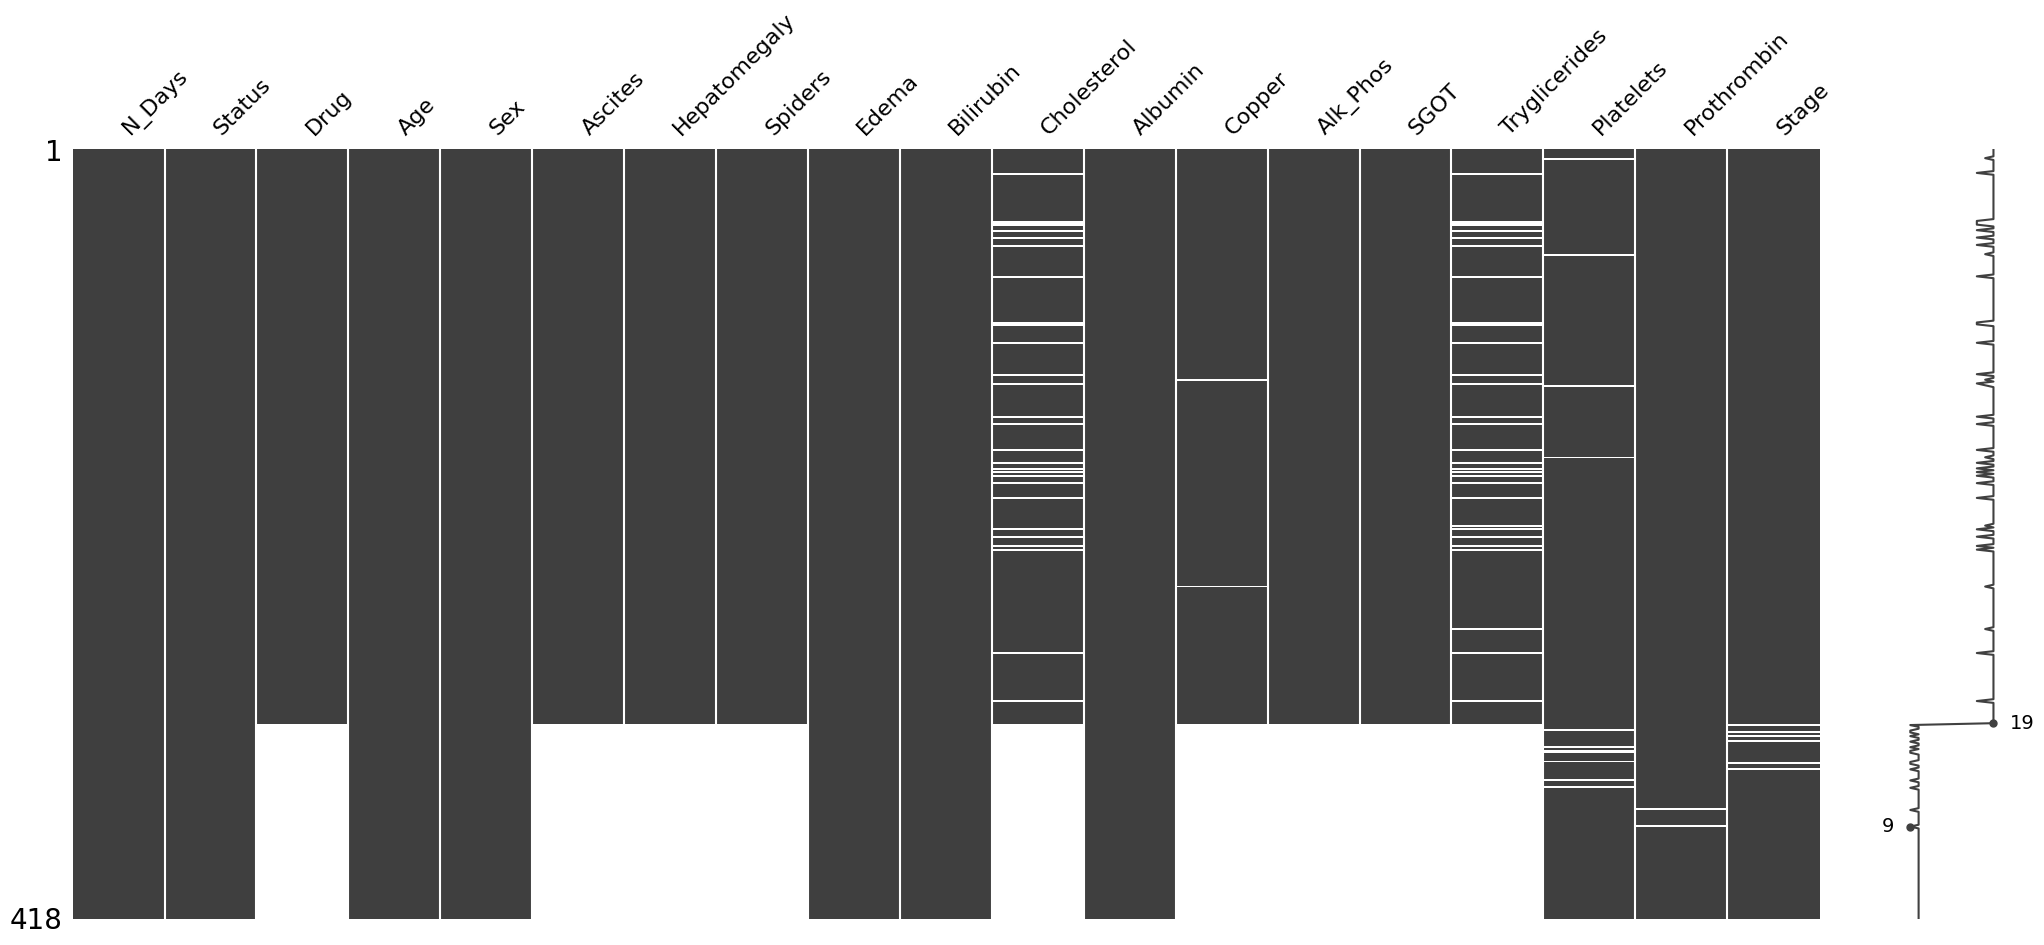

In [ ]:
# # Visualize the missing values using the missingno matrix plot.
msno.matrix(df)

**Inspecting Missing Values**

- Our dataset have MANY null Values!


**Handling Missing Values**

- As the Null Values are for same rows in some columns we will drop the last 25% of the rows and Umpute the others with the mean later.

In [ ]:
# Dropping the last 25% of the rows
df.drop(df.index[int(len(df)*0.75):], inplace=True)
df.isna().sum()

,0
N_Days,0
Status,0
Drug,1
Age,0
Sex,0
Ascites,1
Hepatomegaly,1
Spiders,1
Edema,0
Bilirubin,0


## Inconsistent values inspecting

In [ ]:
inc_col=df.select_dtypes('object')
# loop through the list of string columns
for col in inc_col:
  print(f'Value For {col} column is: ')
  print(df[col].value_counts())
  print('\n')

Value For Status column is: 
Status
C     169
D     125
CL     19
Name: count, dtype: int64


Value For Drug column is: 
Drug
D-penicillamine    158
Placebo            154
Name: count, dtype: int64


Value For Sex column is: 
Sex
F    277
M     36
Name: count, dtype: int64


Value For Ascites column is: 
Ascites
N    288
Y     24
Name: count, dtype: int64


Value For Hepatomegaly column is: 
Hepatomegaly
Y    160
N    152
Name: count, dtype: int64


Value For Spiders column is: 
Spiders
N    222
Y     90
Name: count, dtype: int64


Value For Edema column is: 
Edema
N    264
S     29
Y     20
Name: count, dtype: int64




## Checking impossible values in numaric data types

In [ ]:
df.describe().round(2)

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,313.00,313.00,313.00,284.00,313.00,310.00,312.00,312.00,282.00,309.00,313.00,312.00
mean,2012.93,18281.09,3.25,369.51,3.52,97.65,1982.66,122.56,124.70,262.31,10.73,3.03
std,1127.48,3864.10,4.53,231.94,0.42,85.61,2140.39,56.70,65.15,95.68,1.00,0.88
min,41.00,9598.00,0.30,120.00,1.96,4.00,289.00,26.35,33.00,62.00,9.00,1.00
25%,1191.00,15463.00,0.80,249.50,3.31,41.25,871.50,80.60,84.25,200.00,10.00,2.00
50%,1847.00,18199.00,1.30,309.50,3.55,73.00,1259.00,114.70,108.00,258.00,10.60,3.00
75%,2713.00,20736.00,3.40,400.00,3.80,123.00,1980.00,151.90,151.00,324.00,11.10,4.00
max,4556.00,28650.00,28.00,1775.00,4.64,588.00,13862.40,457.25,598.00,563.00,17.10,4.00


In [ ]:
# As Age column in 'days', to have better understanding let's convert days to years
df['Age'] = (df['Age'] / 365)
df['Age'].head()

,Age
0,58.805479
1,56.484932
2,70.120548
3,54.778082
4,38.131507


## Cardinalty checking for categorical feature

In [ ]:
cat_cols=df.select_dtypes('object').columns
df[cat_cols].describe()

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
count,313,312,313,312,312,312,313
unique,3,2,2,2,2,2,3
top,C,D-penicillamine,F,N,Y,N,N
freq,169,158,277,288,160,222,264


# Exploring Data

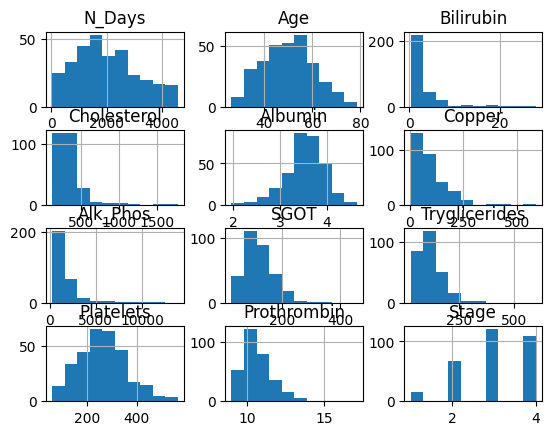

In [ ]:
df.hist()
plt.rcParams['figure.figsize']=[20,15]
plt.show()

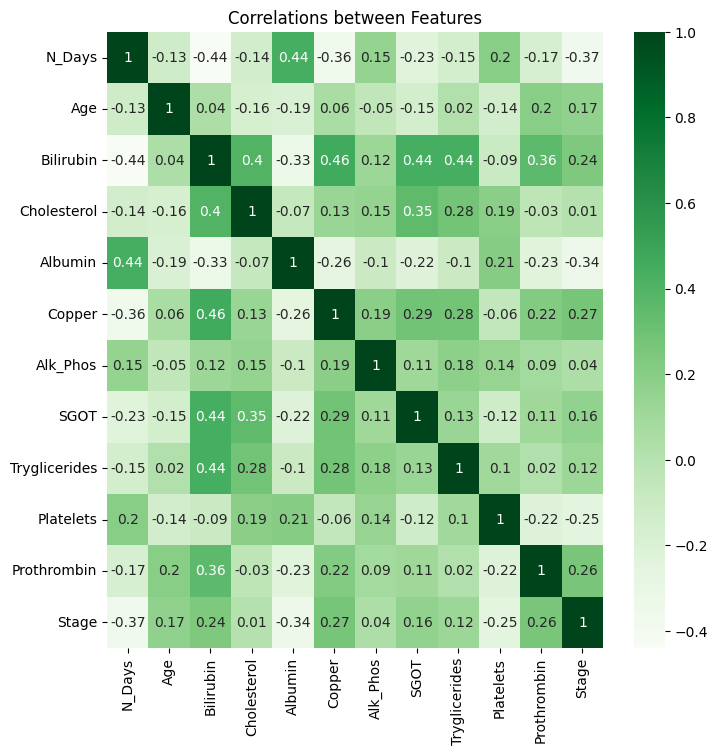

In [ ]:
# Finding correlations
corr_data=df.corr(numeric_only=True)
# Plotting correlations
fig,ax=plt.subplots(figsize=(8,8))
corr_data=round(corr_data,2)
sns.heatmap(data=corr_data,cmap='Greens',annot=True);
ax.set(title='Correlations between Features');

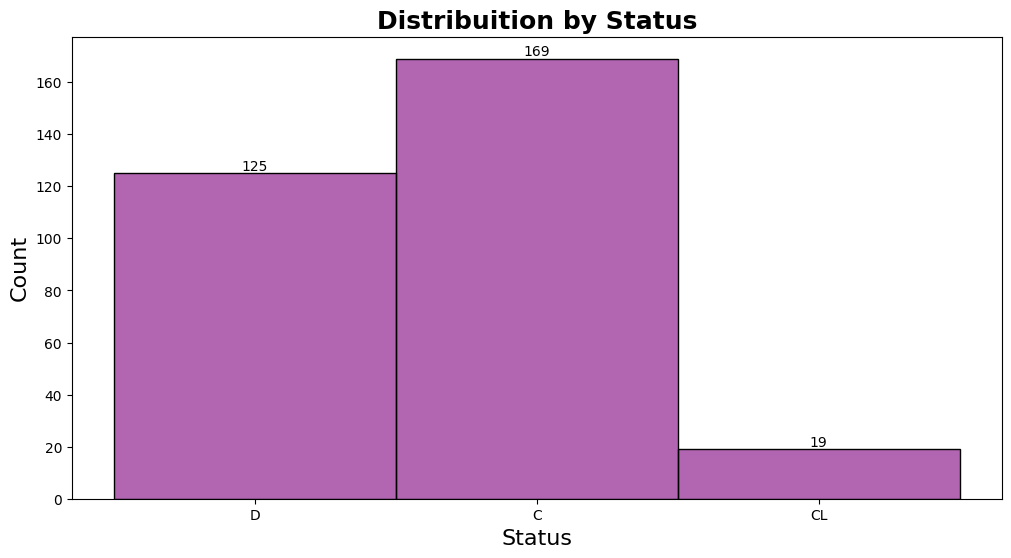

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Status', fontsize=18, fontweight='bold')
ax = sns.histplot(df['Status'], bins=25, color='Purple', alpha=0.6)
plt.xlabel('Status', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab);

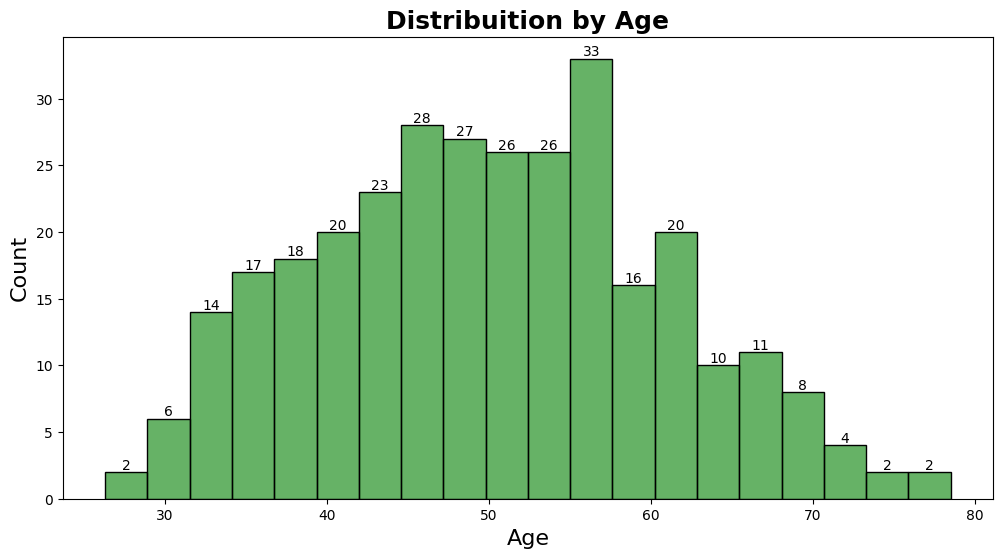

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Age', fontsize=18, fontweight='bold')
ax = sns.histplot(df['Age'], bins=20, color='Green', alpha=0.6)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab);

The majority of individuals in this sample are in their forties to mid-sixties.

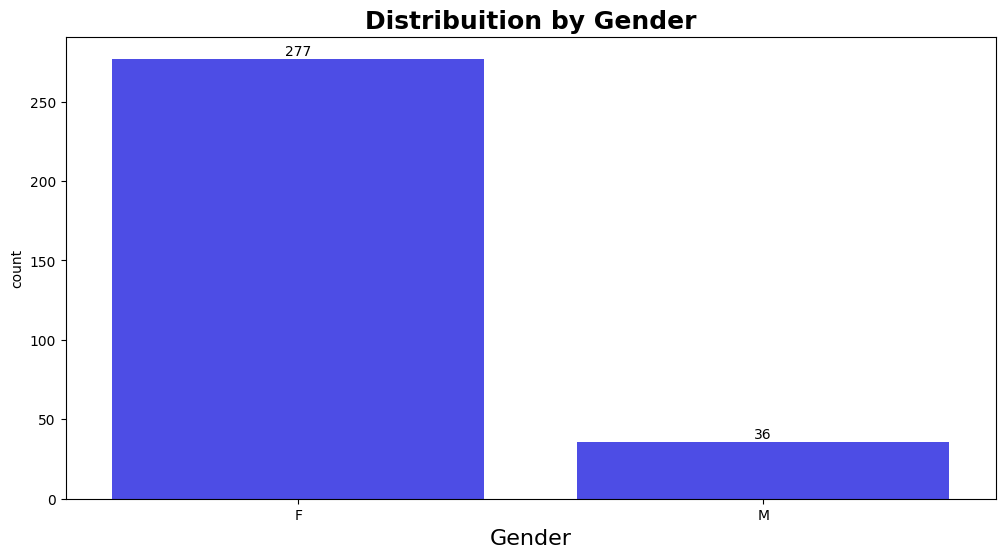

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Gender', fontsize=18, fontweight='bold')
ax = sns.countplot(x=df['Sex'], color='Blue', alpha=0.8)
plt.xlabel('Gender', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab);

The majority of individuals in this sample are women.

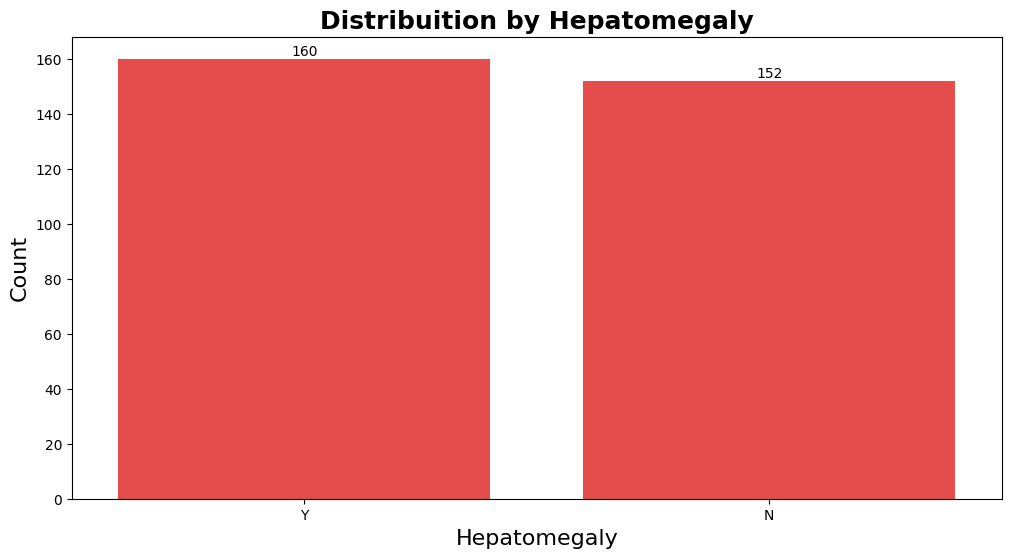

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Hepatomegaly', fontsize=18, fontweight='bold')
ax = sns.countplot(x=df['Hepatomegaly'], color='red', alpha=0.8)
plt.xlabel('Hepatomegaly', fontsize=16)
# plt.xticks(ticks=['N', 'Y'], labels=['No', 'Yes'])
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab);


The majority of individuals have Hepatomegaly

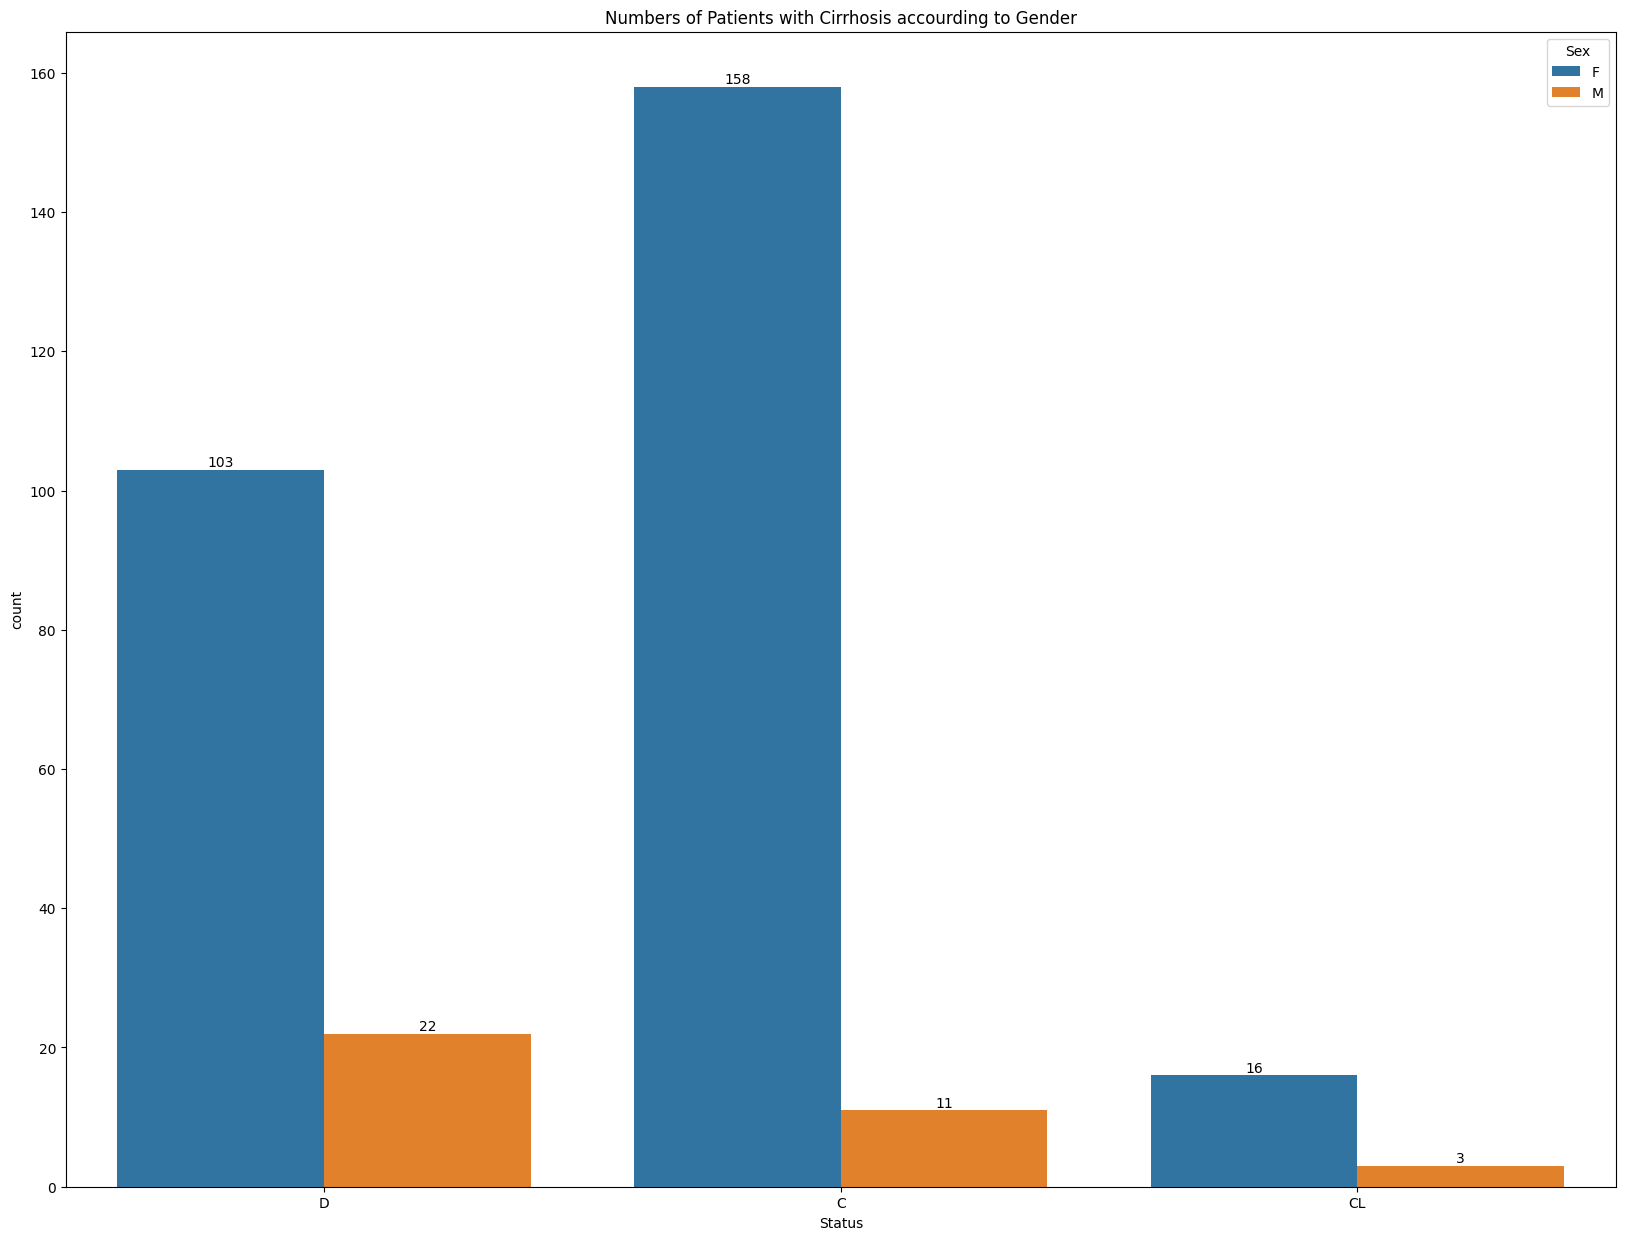

In [ ]:
# Exploring target accourding to Gender
ax = sns.countplot(df, x='Status', hue='Sex' )
plt.title("Numbers of Patients with Cirrhosis accourding to Gender")
for lab in ax.containers:
    ax.bar_label(lab);

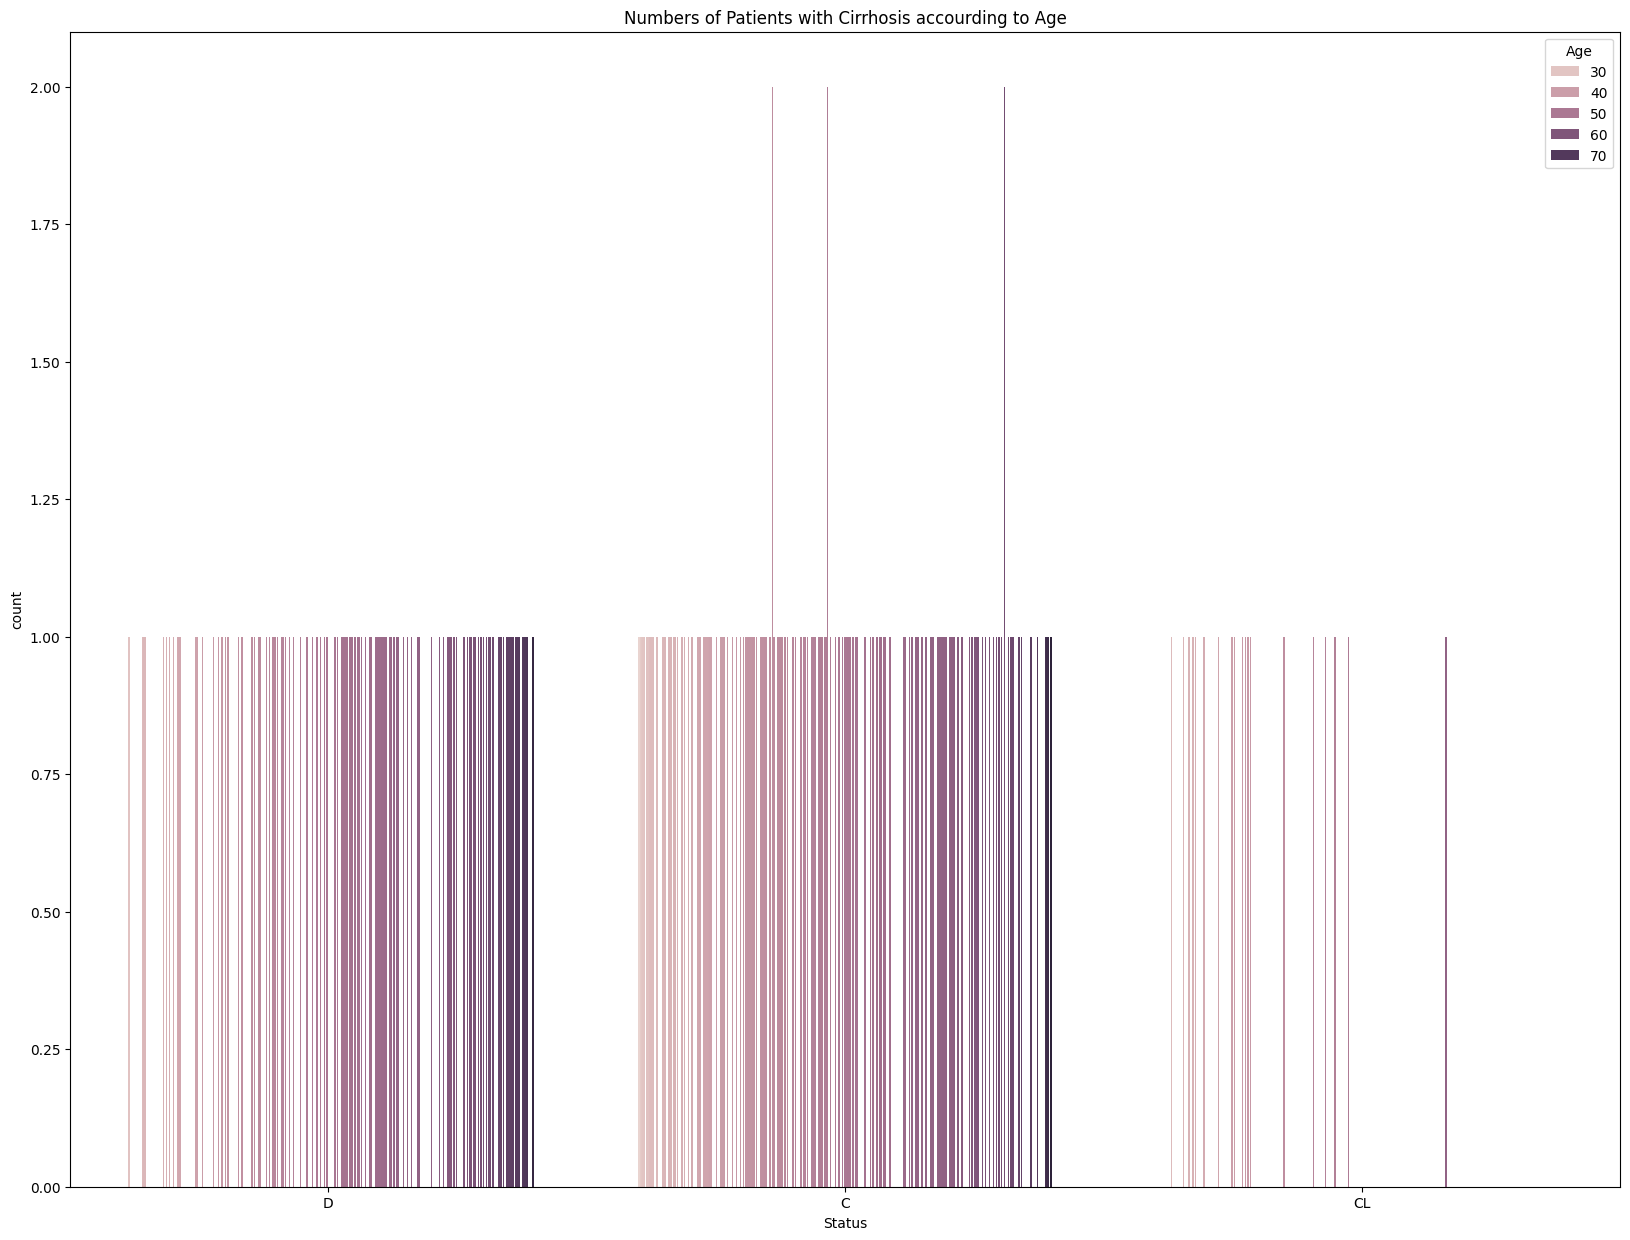

In [ ]:
# Plotting target accourding to Age
ax = sns.countplot(df, x='Status', hue='Age' )
plt.title("Numbers of Patients with Cirrhosis accourding to Age")
plt.show()
for lab in ax.containers:
    ax.bar_label(lab);

It's looks like the older the patient, the worse his condition becomes.

# Preprocessing

## Define X,y. Train Test Split

In [ ]:
df['Status'].replace({'C':0, 'CL':1, 'D':2}, inplace=True)

In [ ]:
# Define features and target
X = df.drop(columns = 'Status')
y = df['Status']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:

# Check for Target balance of target
y_train.value_counts()

,count
Status,
0,177
2,117
1,19


## Preprocessing Numerical Features

In [ ]:
# Numerical Preprocessing Pipeline
X_train = pd.DataFrame(X_train, columns=X.columns)
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
# instantiate preprocessors
impute_mean = SimpleImputer(strategy='mean')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_mean, scaler)
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 Index(['ID', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
        'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
        'Stage'],
       dtype='object'))

## Preprocessing Categorical Features

In [ ]:
# Categorical Preprocessing Pipeline
# Save list of column names
cat_cols = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='most_frequent', fill_value = "most_frequent")
ohe =OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
cat_pipe = make_pipeline(impute_na, ohe)
# Making a ohe_tuple for ColumnTransformer
cat_tuple = ('categorical', cat_pipe, cat_cols)
cat_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='most_frequent',
                                strategy='most_frequent')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'])

In [ ]:
X_train.dtypes


,0
ID,int64
N_Days,int64
Drug,object
Age,int64
Sex,object
Ascites,object
Hepatomegaly,object
Spiders,object
Edema,object
Bilirubin,float64


In [ ]:
# Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
# Balancing the target by smote
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()


ValueError: could not convert string to float: 'Placebo'

## Column Transformer

In [ ]:
preprocessor =ColumnTransformer([num_tuple,cat_tuple], verbose_feature_names_out=False, remainder='passthrough')

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='most_frequent',
                                                                strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Drug', 'Sex', 'Ascites', 'Hepatomegaly',
                                  'Spiders', 'Edema'])],
                  verbose_feature_names_out=False)

# KNN Model

In [ ]:
# Instantiate the Model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
# Making model pipeline
knn_pipe=make_pipeline(preprocessor, knn)
# Fitting the model pipe on training set
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='most_frequent',
                                                                                 strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Drug', 'Sex', 'Ascites',
                                                   'Hepatomegaly', 'Spiders',
                                                   'Edema'])],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

## Evaluate Model

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
    # Get the classification report
    report = classification_report(y_true, y_pred)
    ## Print header and report
    header = "-"*70
    print(header, f" Classification Metrics: {label}", header, sep='\n')
    print(report)
    ## CONFUSION MATRICES SUBPLOTS
    fig, axes = plt.subplots(ncols=2, figsize=figsize)
    # create a confusion matrix  of raw counts
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
    axes[0].set_title("Raw Counts")
    # create a confusion matrix with the test data
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
    axes[1].set_title("Normalized Confusion Matrix")
    # Adjust layout and show figure
    fig.tight_layout()
    plt.show()
    # Return dictionary of classification_report
    if output_dict==True:
        report_dict = classification_report(y_true, y_pred, output_dict=True)
        return report_dict


def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
    # Get predictions for training data
    y_train_pred = model.predict(X_train)
    # Call the helper function to obtain regression metrics for training data
    results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
    print()
    # Get predictions for test data
    y_test_pred = model.predict(X_test)
    # Call the helper function to obtain regression metrics for test data
    results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
    if output_dict == True:
        # Store results in a dataframe if ouput_frame is True
        results_dict = {'train':results_train,
                    'test': results_test}
        return results_dict

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.94      0.84       130
           1       1.00      0.10      0.18        10
           2       0.86      0.68      0.76        94

    accuracy                           0.80       234
   macro avg       0.88      0.57      0.60       234
weighted avg       0.82      0.80      0.78       234



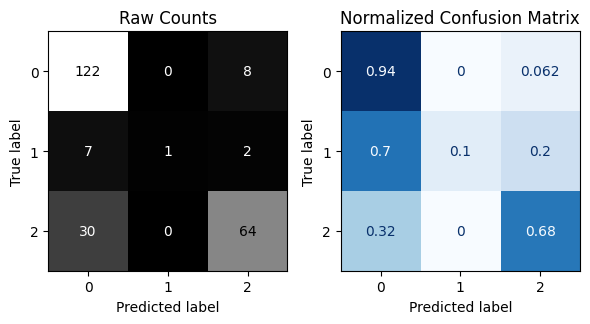


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.95      0.78        39
           1       1.00      0.11      0.20         9
           2       0.86      0.61      0.72        31

    accuracy                           0.72        79
   macro avg       0.84      0.56      0.57        79
weighted avg       0.78      0.72      0.69        79



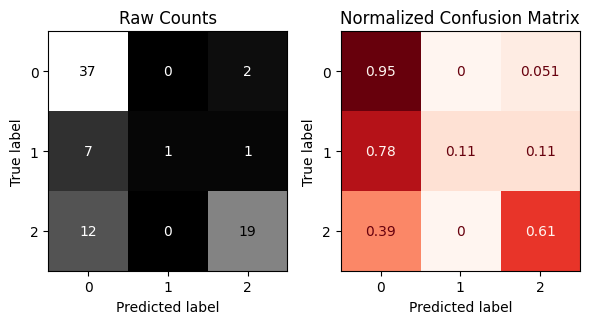

In [ ]:
evaluate_classification(knn_pipe, X_train,y_train, X_test, y_test)

# Features Importance

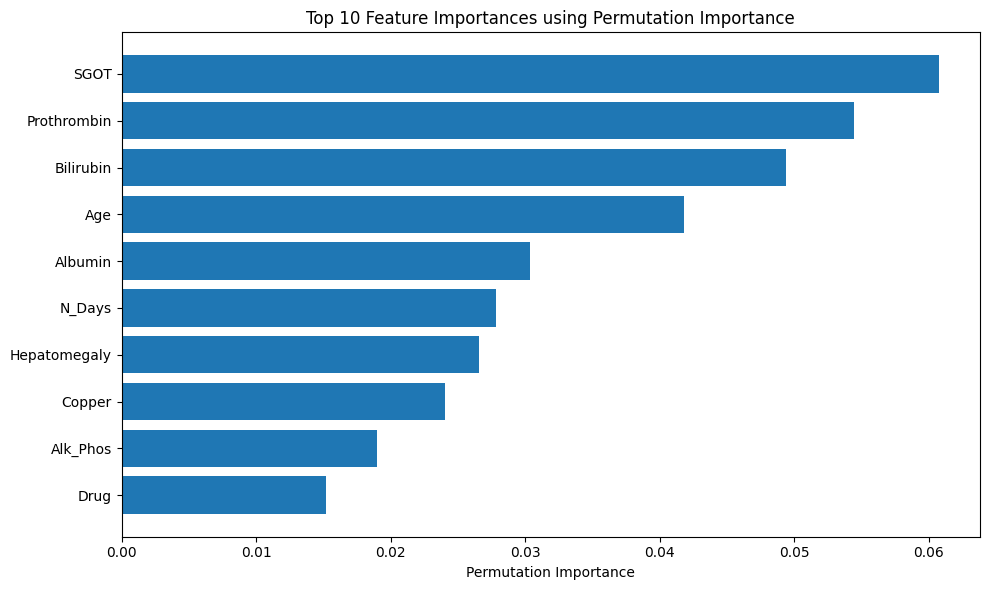

In [ ]:
# Extract and visualize the top 10 features using permutation importance
from sklearn.inspection import permutation_importance

result = permutation_importance(knn_pipe, X_test, y_test, n_repeats=10, random_state=42)

# Get feature importances and their indices
importances = result.importances_mean
indices = np.argsort(importances)

# Select the top 10 features
top_10_indices = indices[-10:]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances using Permutation Importance")
plt.barh(range(len(top_10_indices)), importances[top_10_indices], align="center")
plt.yticks(range(len(top_10_indices)), [X_test.columns[i] for i in top_10_indices])
plt.xlabel("Permutation Importance")
plt.tight_layout()
plt.show()


## Features observations

These to 10 features align well with what is expected in a cirrhosis prediction model. They represent clinical markers of liver function, structural changes, and demographic data, all of which are pertinent for assessing liver health and disease risk.

- SGOT, Prothrombin, and Bilirubin: Key liver function markers that indicate liver damage.
- Age: Older age increases the risk of cirrhosis.
- Albumin: Low levels suggest poor liver function.
- N_Days: May represent time since diagnosis or disease progression.
- Hepatomegaly: Enlarged liver is common in cirrhosis.
- Copper: Can be relevant if related to liver conditions like Wilson's disease.
- Alk_Phos (Alkaline Phosphatase): High levels indicate liver issues.
- Drug: Could reflect treatment or medication impact on the liver.

## Exploring Target with Top Features

### Bilirubin with Target

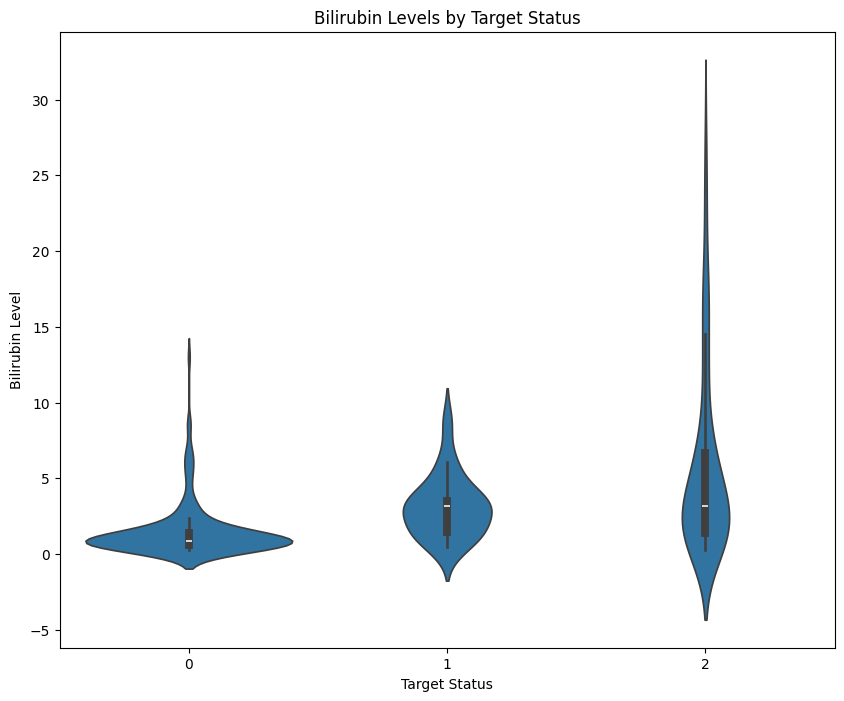

In [ ]:
# Bilirubin vs Status using boxplot
plt.figure(figsize=(10, 8))

sns.violinplot(x='Status', y='Bilirubin', data=df)
plt.title("Bilirubin Levels by Target Status")
plt.xlabel("Target Status")
plt.ylabel("Bilirubin Level")

plt.show()

The widest range and the highest bilirubin levels can be seen at the D group "People who died with cirrhosis". This suggests that higher bilirubin levels are strongly associated with with patients who did not survive.  The difference in distribution among C and CL shows how bilirubin may influence treatment paths (e.g., monitoring vs. transplant consideration).

However, Understanding bilirubin levels' distribution across patient outcomes helps Doctors and researchers identify critical risk factors and evaluate potential intervention points to prevent severe outcomes, such as liver failure and death.

### Age with Target

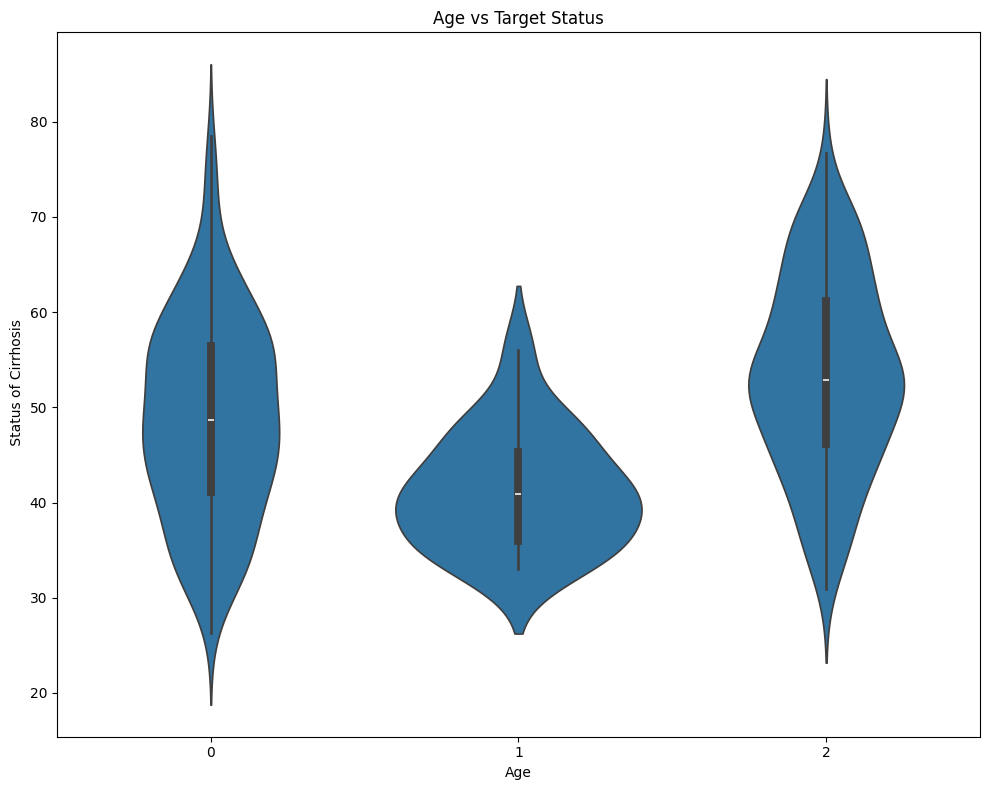

In [ ]:
# Plot 2: Age vs Status using boxplot
plt.figure(figsize=(10, 8))

sns.violinplot(x='Status', y='Age', data=df)
plt.title("Age vs Target Status")
plt.xlabel("Age")
plt.ylabel(" Status of Cirrhosis")

plt.tight_layout()
plt.show()

Patients who die from cirrhosis (group D) span a broader age range, indicating that severe cases affect individuals at various stages of adulthood. The relatively narrower range in CL implies that transplants are more common in middle-aged adults, potentially reflecting medical decisions made earlier in the progression of cirrhosis.

The plott indecate that the typical age profile for different patient outcomes, which could be vital for planning medical resources, early interventions, and targeted care for age-specific demographics.

# Feature Engineering

In [ ]:
data= df.copy()

In [ ]:
# Engineering Age:

# Categorize age into groups (Young, Middle-aged, Old)
def categorize_age(age):
    if age < 15000:
        return 'Young'
    elif age < 22000:
        return 'Middle-aged'
    else:
        return 'Old'

for data in [data]:
    data['Age_Category'] = data['Age'].apply(categorize_age)

In [ ]:
# Liver Enzyme Ratio, as it can show the severity of the liver damage
# Create a ratio of SGOT to Alk_Phos, indicating liver enzyme balance
for data in [data]:
    data['SGOT_Alk_Phos_Ratio'] = data['SGOT'] / data['Alk_Phos']

In [ ]:
# Engineering Platelets
#As the normal platelet count in adults ranges from 150,000 to 450,000 platelets per microliter of blood

def categorize_platelets(platelets):
    if platelets < 150:
        return 'Low'
    elif platelets <= 450:
        return 'Normal'
    else:
        return 'High'
# Apply the function to the 'Platelets' column of the DataFrame
data['Platelets_Category'] = data['Platelets'].apply(categorize_platelets)

In [ ]:
# Cholesterol Level Category
# Categorize cholesterol levels into groups (Normal, Borderline High, High)
def categorize_cholesterol(level):
    if level < 200:
        return 'Normal'
    elif level < 239:
        return 'Borderline High'
    else:
        return 'High'

for data in [data]:
    data['Cholesterol_Level'] = data['Cholesterol'].apply(categorize_cholesterol)

# Preprocessing Over again With PCA

In [ ]:
X = data.drop('Status', axis=1)
y = data['Status']

# Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=321)


In [ ]:
# Checking data type
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 102 to 26
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   N_Days               234 non-null    int64  
 1   Drug                 233 non-null    object 
 2   Age                  234 non-null    float64
 3   Sex                  234 non-null    object 
 4   Ascites              233 non-null    object 
 5   Hepatomegaly         233 non-null    object 
 6   Spiders              233 non-null    object 
 7   Edema                234 non-null    object 
 8   Bilirubin            234 non-null    float64
 9   Cholesterol          215 non-null    float64
 10  Albumin              234 non-null    float64
 11  Copper               232 non-null    float64
 12  Alk_Phos             233 non-null    float64
 13  SGOT                 233 non-null    float64
 14  Tryglicerides        213 non-null    float64
 15  Platelets            230 non-null    float64

In [ ]:
# Defining numericasl data and categorical data
num_cols = data.select_dtypes('number').columns.drop('Status')
cat_cols = data.select_dtypes('object').columns
print(num_cols)
print(cat_cols)

Index(['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage',
       'Age_Category', 'SGOT_Alk_Phos_Ratio', 'Platelets_Category',
       'Cholesterol_Level', 'cluster'],
      dtype='object')
Index([], dtype='object')


In [ ]:
# Imputing NANs
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

X_train[num_cols] = numerical_imputer.fit_transform(X_train[num_cols])
X_train[cat_cols] = categorical_imputer.fit_transform(X_train[cat_cols])
X_test[num_cols] = numerical_imputer.transform(X_test[num_cols])
X_test[cat_cols] = categorical_imputer.transform(X_test[cat_cols])


In [ ]:
# Encoding Categorical Variables
label_encoders = {}
for column in cat_cols:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])
    label_encoders[column] = le
print(X_train)
print(X_test)

       N_Days  Drug       Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
102 -1.621719     1 -0.197146    0        1             1        1      2   
118 -1.260369     0  0.305348    0        0             0        1      0   
290 -0.915970     0 -0.962716    0        0             0        0      0   
252 -0.145089     0  2.601536    1        1             1        1      0   
190 -1.527143     1  0.156913    0        1             1        1      0   
..        ...   ...       ...  ...      ...           ...      ...    ...   
200  0.326897     1 -0.944519    0        0             1        0      0   
297 -0.559973     1  0.160033    0        0             1        0      0   
287 -0.767861     1 -0.199746    0        0             1        0      1   
124  0.482144     1 -0.366377    0        0             1        0      0   
26  -1.651163     1  0.322765    0        1             1        1      1   

     Bilirubin  Cholesterol  ...  Alk_Phos      SGOT  Tryglicerides  \
102 

In [ ]:
# Scaling Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [ ]:
# Instantiate & fit data using PCA
# Choosing 0.95 variance to include the 95% most important features
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

# Apply PCA on imputed training and testing datasets
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Convert column names of PCA DataFrames to strings
X_train_pca = pd.DataFrame(X_train_pca, columns=[f'pca_{i}' for i in range(X_train_pca.shape[1])])
X_test_pca = pd.DataFrame(X_test_pca, columns=[f'pca_{i}' for i in range(X_test_pca.shape[1])])

## KNN with PCA

In [ ]:
# Instantiate the Model again with PCA
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train)


ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Evaluate the new model
evaluate_classification(knn_pca, X_train_pca,y_train, X_test_pca, y_test)

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# KMean Clustering

In [ ]:
# Features Transformation

data['Drug'].replace({'D-penicillamine':0, 'Placebo':1}, inplace=True)
data['Sex'].replace({'F':0, 'M':1}, inplace=True)
data['Ascites'].replace({'N':0, 'Y':1}, inplace=True)
data['Hepatomegaly'].replace({'N':0, 'Y':1}, inplace=True)
data['Spiders'].replace({'N':0, 'Y':1}, inplace=True)
data['Edema'].replace({'N':0, 'S':1, 'Y':2}, inplace=True)
data['Age_Category'].replace({'Young':0, 'Middle-aged':1, 'Old':2}, inplace=True)
data['Platelets_Category'].replace({'Low':0, 'Normal':1, 'High':2}, inplace=True)
data['Cholesterol_Level'].replace({'Normal':0, 'Borderline High':1, 'High':2}, inplace=True)

<ipython-input-118-bf0da16d645f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Drug'].replace({'D-penicillamine':0, 'Placebo':1}, inplace=True)
<ipython-input-118-bf0da16d645f>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Drug'].replace({'D-penicillamine':0, 'Placebo':1}, inplace=

In [ ]:
# Instantiate Standard Scaler and Imputer
scaler = StandardScaler()
imputer = SimpleImputer(strategy='mean')

# Apply Imputer
data = imputer.fit_transform(data)
# Fit & transform data.
scaled_data = scaler.fit_transform(data)


In [ ]:
#Instantiate KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ks = range(2,11)
inertias = []
silhouette = []

for k in ks:
  kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state=42)
  kmeans.fit(scaled_data)
  silhouette.append(silhouette_score(scaled_data, kmeans.labels_))
  inertias.append(kmeans.inertia_)

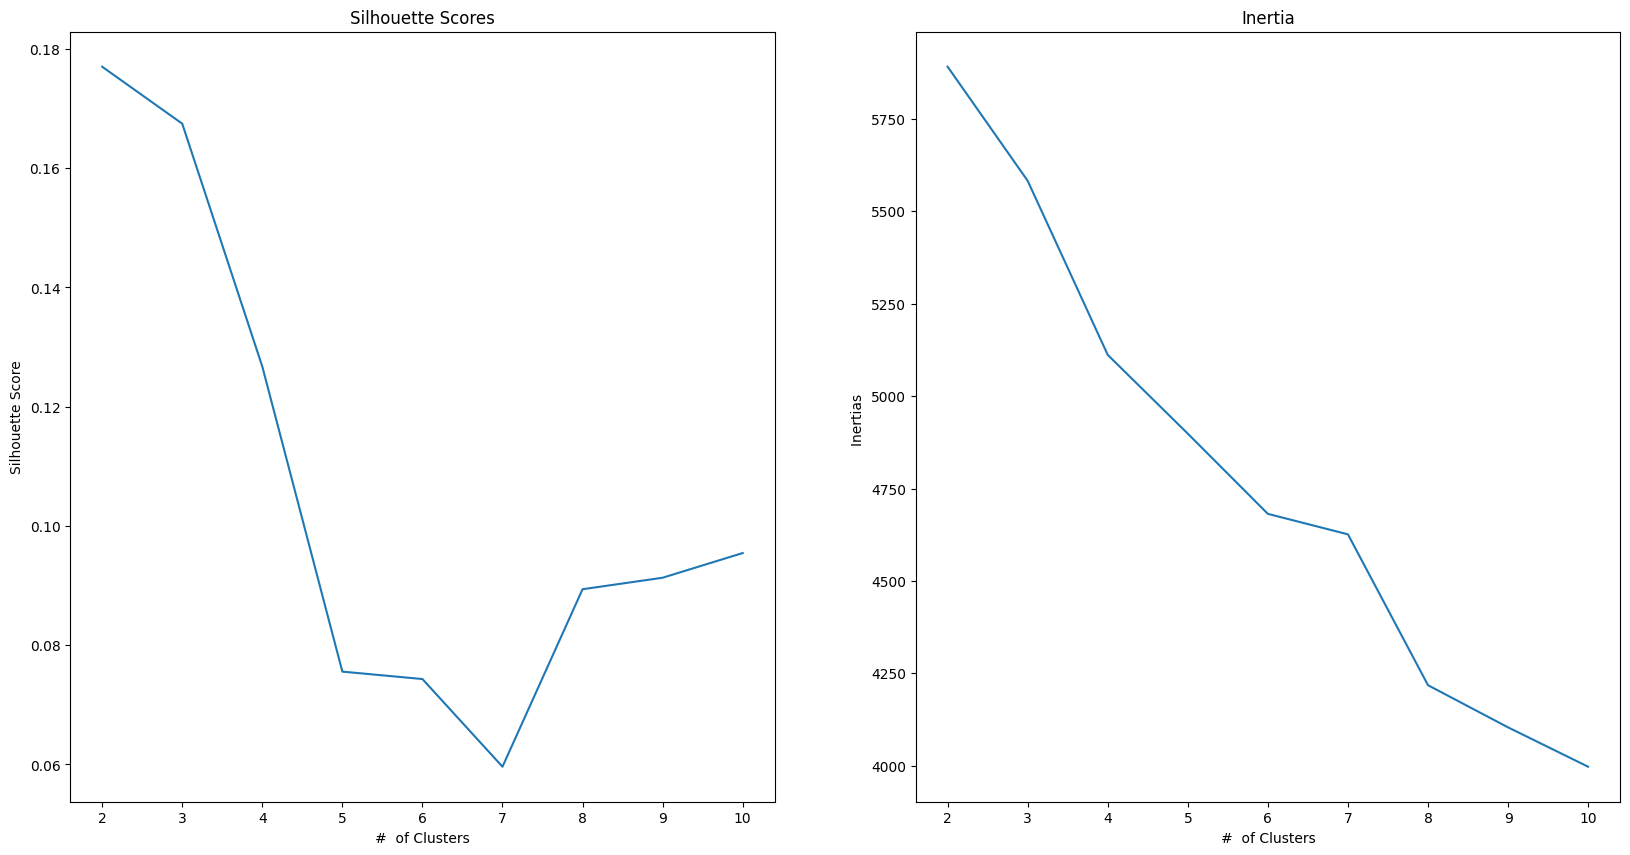

In [ ]:
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(20, 10))
axes[0].plot(ks, silhouette)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[0].set_xlabel('#  of Clusters')
axes[0].set_ylabel('Silhouette Score')
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xlabel('#  of Clusters')
axes[1].set_ylabel('Inertias ')
axes[1].set_xticks(ks);

The best silhouette Score whithin 2 clusters, The Elbow shows that the best Clustere go with 4 K or 6 K.

In [ ]:
#Initialize and Fit KMeans:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_data)

# Add the clusters as a column in the dataframe
data['cluster'] = kmeans.labels_
data.head()


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age_Category,SGOT_Alk_Phos_Ratio,Platelets_Category,Cholesterol_Level,cluster
0,400.0,2.0,0.0,58.805479,0.0,1.0,1.0,1.0,2.0,14.5,...,137.95,172.0,190.0,12.2,4.0,0.0,0.080297,1.0,2.0,0
1,4500.0,0.0,0.0,56.484932,0.0,0.0,1.0,1.0,0.0,1.1,...,113.52,88.0,221.0,10.6,3.0,0.0,0.015351,1.0,2.0,1
2,1012.0,2.0,0.0,70.120548,1.0,0.0,0.0,0.0,1.0,1.4,...,96.10,55.0,151.0,12.0,4.0,0.0,0.186240,1.0,0.0,0
3,1925.0,2.0,0.0,54.778082,0.0,0.0,1.0,1.0,1.0,1.8,...,60.63,92.0,183.0,10.3,4.0,0.0,0.009904,1.0,2.0,0
4,1504.0,1.0,1.0,38.131507,0.0,0.0,1.0,1.0,0.0,3.4,...,113.15,72.0,136.0,10.9,3.0,0.0,0.168629,0.0,2.0,0


In [ ]:
# Group the dataframe by cluster and aggregate by mean values
cluster_groups = data.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,...,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age_Category,SGOT_Alk_Phos_Ratio,Platelets_Category,Cholesterol_Level
0,0,1269.183333,1.650000,0.491667,52.411986,0.191667,0.200000,0.850000,0.508333,0.491667,...,2279.076667,146.598500,141.561879,220.866667,11.322500,3.575000,0.0,0.102954,0.716667,1.741667
1,1,2475.362694,0.367876,0.494785,48.638456,0.067358,0.000399,0.303175,0.151754,0.051813,...,1798.352621,107.607857,114.219380,288.078978,10.355959,2.694467,0.0,0.089679,1.041451,1.766839


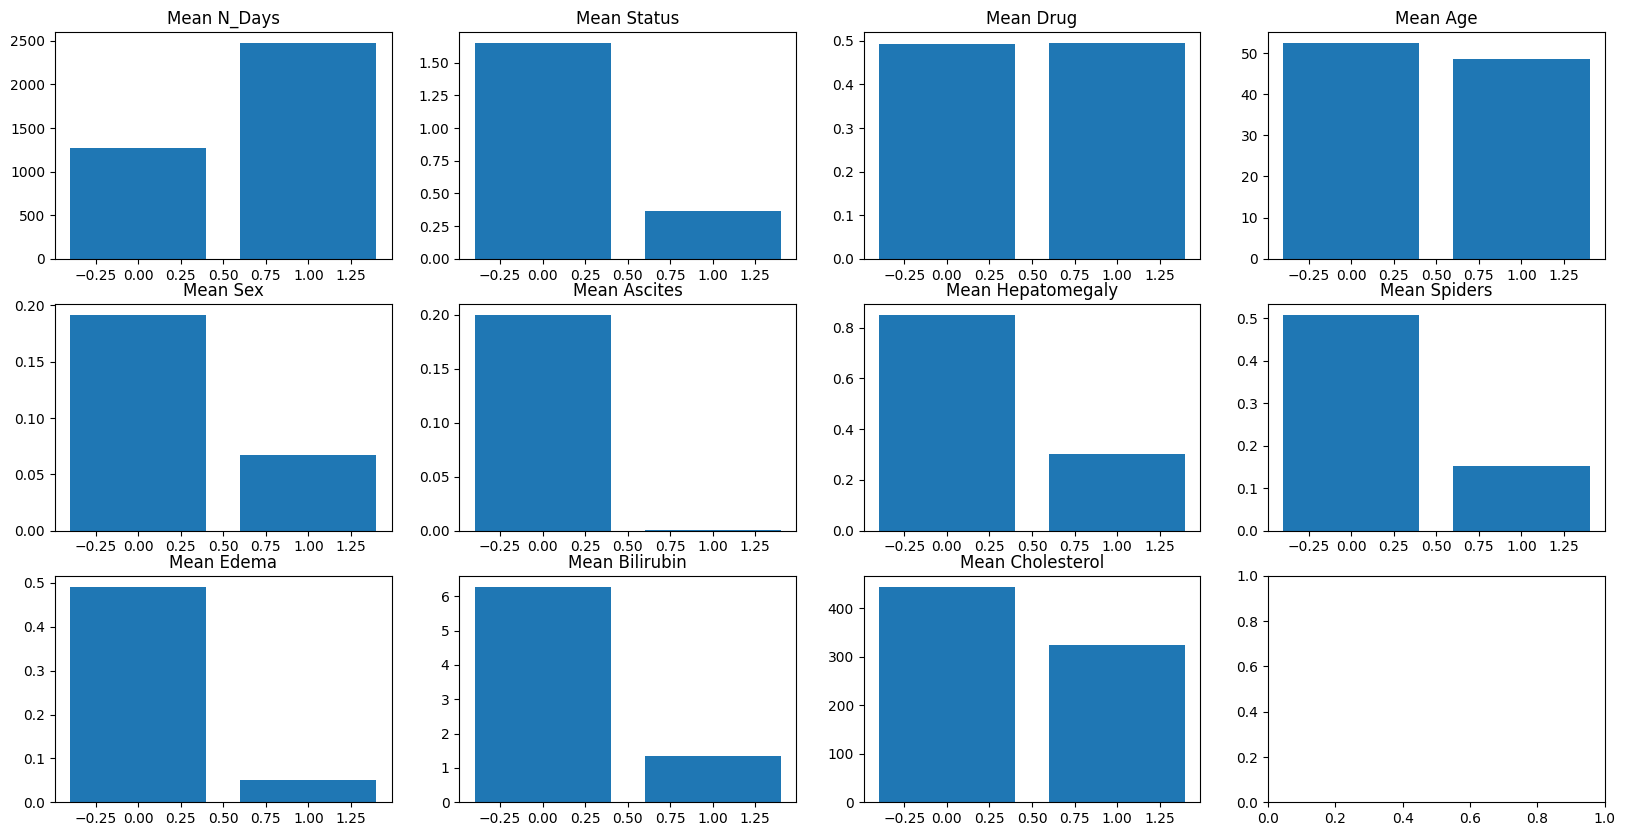

In [ ]:
# Visualize means
fig, axes = plt.subplots(3,4, figsize = (20, 10))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:12]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

In [ ]:
#Initialize and Fit KMeans with 6K:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(scaled_data)

# Add the clusters as a column in the dataframe
data['cluster'] = kmeans.labels_
data.head()


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age_Category,SGOT_Alk_Phos_Ratio,Platelets_Category,Cholesterol_Level,cluster
0,400.0,2.0,0.0,58.805479,0.0,1.0,1.0,1.0,2.0,14.5,...,137.95,172.0,190.0,12.2,4.0,0.0,0.080297,1.0,2.0,4
1,4500.0,0.0,0.0,56.484932,0.0,0.0,1.0,1.0,0.0,1.1,...,113.52,88.0,221.0,10.6,3.0,0.0,0.015351,1.0,2.0,2
2,1012.0,2.0,0.0,70.120548,1.0,0.0,0.0,0.0,1.0,1.4,...,96.10,55.0,151.0,12.0,4.0,0.0,0.186240,1.0,0.0,3
3,1925.0,2.0,0.0,54.778082,0.0,0.0,1.0,1.0,1.0,1.8,...,60.63,92.0,183.0,10.3,4.0,0.0,0.009904,1.0,2.0,2
4,1504.0,1.0,1.0,38.131507,0.0,0.0,1.0,1.0,0.0,3.4,...,113.15,72.0,136.0,10.9,3.0,0.0,0.168629,0.0,2.0,0


In [ ]:
# Group the dataframe by cluster and aggregate by mean values
cluster_groups = data.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,...,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age_Category,SGOT_Alk_Phos_Ratio,Platelets_Category,Cholesterol_Level
0,0,1506.602273,1.511364,0.556818,48.745237,0.000000,0.045455,0.806818,0.568182,0.159091,...,1832.852273,153.976818,124.609284,229.034091,11.084091,3.511364,0.0,0.102082,0.784091,1.920455
1,1,2108.620370,0.138889,0.564815,48.440284,0.000000,0.000000,0.296296,0.120370,0.064815,...,1125.101852,100.409259,113.616824,257.252877,10.097222,2.768519,0.0,0.099570,0.972222,1.685185
2,2,3051.937500,1.375000,0.375000,50.750171,0.125000,0.000000,0.687500,0.312500,0.125000,...,9516.387500,105.376875,141.881649,308.562500,10.956250,3.250000,0.0,0.011298,1.125000,1.937500
3,3,1864.035714,1.392857,0.392857,55.322016,1.000000,0.000000,0.642857,0.071429,0.142857,...,1689.085714,128.915357,131.750000,251.535714,10.750000,3.142857,0.0,0.102187,0.857143,1.750000
4,4,535.875000,1.833333,0.416667,58.315525,0.166667,0.833333,0.833333,0.666667,1.666667,...,1980.191667,148.667917,167.337766,185.291667,12.112500,3.875000,0.0,0.127361,0.500000,1.166667
5,5,3180.612245,0.326531,0.357012,48.876265,0.040816,0.001570,0.173731,0.087520,0.040816,...,1850.776648,104.128293,118.782023,361.998613,10.704082,2.204736,0.0,0.078104,1.204082,1.857143


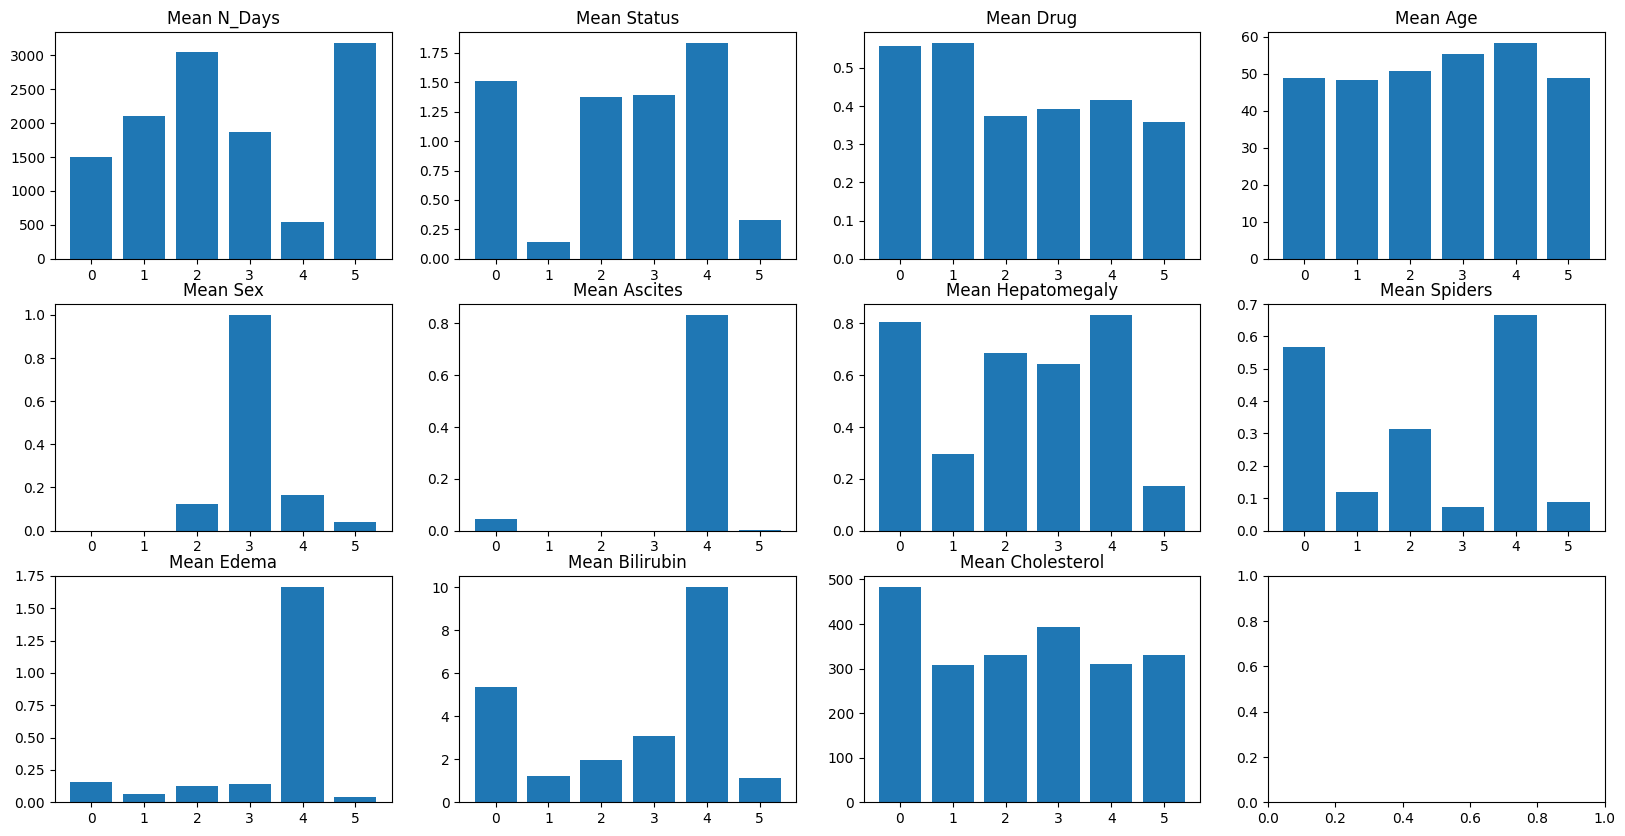

In [ ]:
# Visualize means
fig, axes = plt.subplots(3,4, figsize = (20, 10))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:12]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

In [ ]:
# Predict cluster labels
y_train_clusters = kmeans.labels_
y_test_clusters = kmeans.predict(scaled_data)

# Features Selection; Filter Feature

In [ ]:
# Copying the data
Data= data.copy()
Data.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age_Category,SGOT_Alk_Phos_Ratio,Platelets_Category,Cholesterol_Level,cluster
0,400.0,2.0,0.0,58.805479,0.0,1.0,1.0,1.0,2.0,14.5,...,137.95,172.0,190.0,12.2,4.0,0.0,0.080297,1.0,2.0,4
1,4500.0,0.0,0.0,56.484932,0.0,0.0,1.0,1.0,0.0,1.1,...,113.52,88.0,221.0,10.6,3.0,0.0,0.015351,1.0,2.0,2
2,1012.0,2.0,0.0,70.120548,1.0,0.0,0.0,0.0,1.0,1.4,...,96.10,55.0,151.0,12.0,4.0,0.0,0.186240,1.0,0.0,3
3,1925.0,2.0,0.0,54.778082,0.0,0.0,1.0,1.0,1.0,1.8,...,60.63,92.0,183.0,10.3,4.0,0.0,0.009904,1.0,2.0,2
4,1504.0,1.0,1.0,38.131507,0.0,0.0,1.0,1.0,0.0,3.4,...,113.15,72.0,136.0,10.9,3.0,0.0,0.168629,0.0,2.0,0


In [ ]:
# Features Transformation for new frame

Data['Drug'].replace({'D-penicillamine':0, 'Placebo':1}, inplace=True)
Data['Sex'].replace({'F':0, 'M':1}, inplace=True)
Data['Ascites'].replace({'N':0, 'Y':1}, inplace=True)
Data['Hepatomegaly'].replace({'N':0, 'Y':1}, inplace=True)
Data['Spiders'].replace({'N':0, 'Y':1}, inplace=True)
Data['Edema'].replace({'N':0, 'S':1, 'Y':2}, inplace=True)
Data.head()

<ipython-input-130-940e0458b571>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['Drug'].replace({'D-penicillamine':0, 'Placebo':1}, inplace=True)
<ipython-input-130-940e0458b571>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age_Category,SGOT_Alk_Phos_Ratio,Platelets_Category,Cholesterol_Level,cluster
0,400.0,2.0,0.0,58.805479,0.0,1.0,1.0,1.0,2.0,14.5,...,137.95,172.0,190.0,12.2,4.0,0.0,0.080297,1.0,2.0,4
1,4500.0,0.0,0.0,56.484932,0.0,0.0,1.0,1.0,0.0,1.1,...,113.52,88.0,221.0,10.6,3.0,0.0,0.015351,1.0,2.0,2
2,1012.0,2.0,0.0,70.120548,1.0,0.0,0.0,0.0,1.0,1.4,...,96.10,55.0,151.0,12.0,4.0,0.0,0.186240,1.0,0.0,3
3,1925.0,2.0,0.0,54.778082,0.0,0.0,1.0,1.0,1.0,1.8,...,60.63,92.0,183.0,10.3,4.0,0.0,0.009904,1.0,2.0,2
4,1504.0,1.0,1.0,38.131507,0.0,0.0,1.0,1.0,0.0,3.4,...,113.15,72.0,136.0,10.9,3.0,0.0,0.168629,0.0,2.0,0


In [ ]:
# Defining X and Y
X = Data.drop('Status', axis=1)
y = Data['Status']

# Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=321)
X_train.shape

(234, 23)

In [ ]:
# Simple Imputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test= imputer.transform(X_test)
# Scaling Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [ ]:
# Check the balance of the target
y.value_counts(1)

,proportion
Status,
0.0,0.539936
2.0,0.399361
1.0,0.060703


In [ ]:
# Balancing Data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_train_sm,y_train_sm = smote.fit_resample(X_train_scaled, y_train)
y_train_sm.value_counts()

,count
Status,
2.0,119
1.0,119
0.0,119


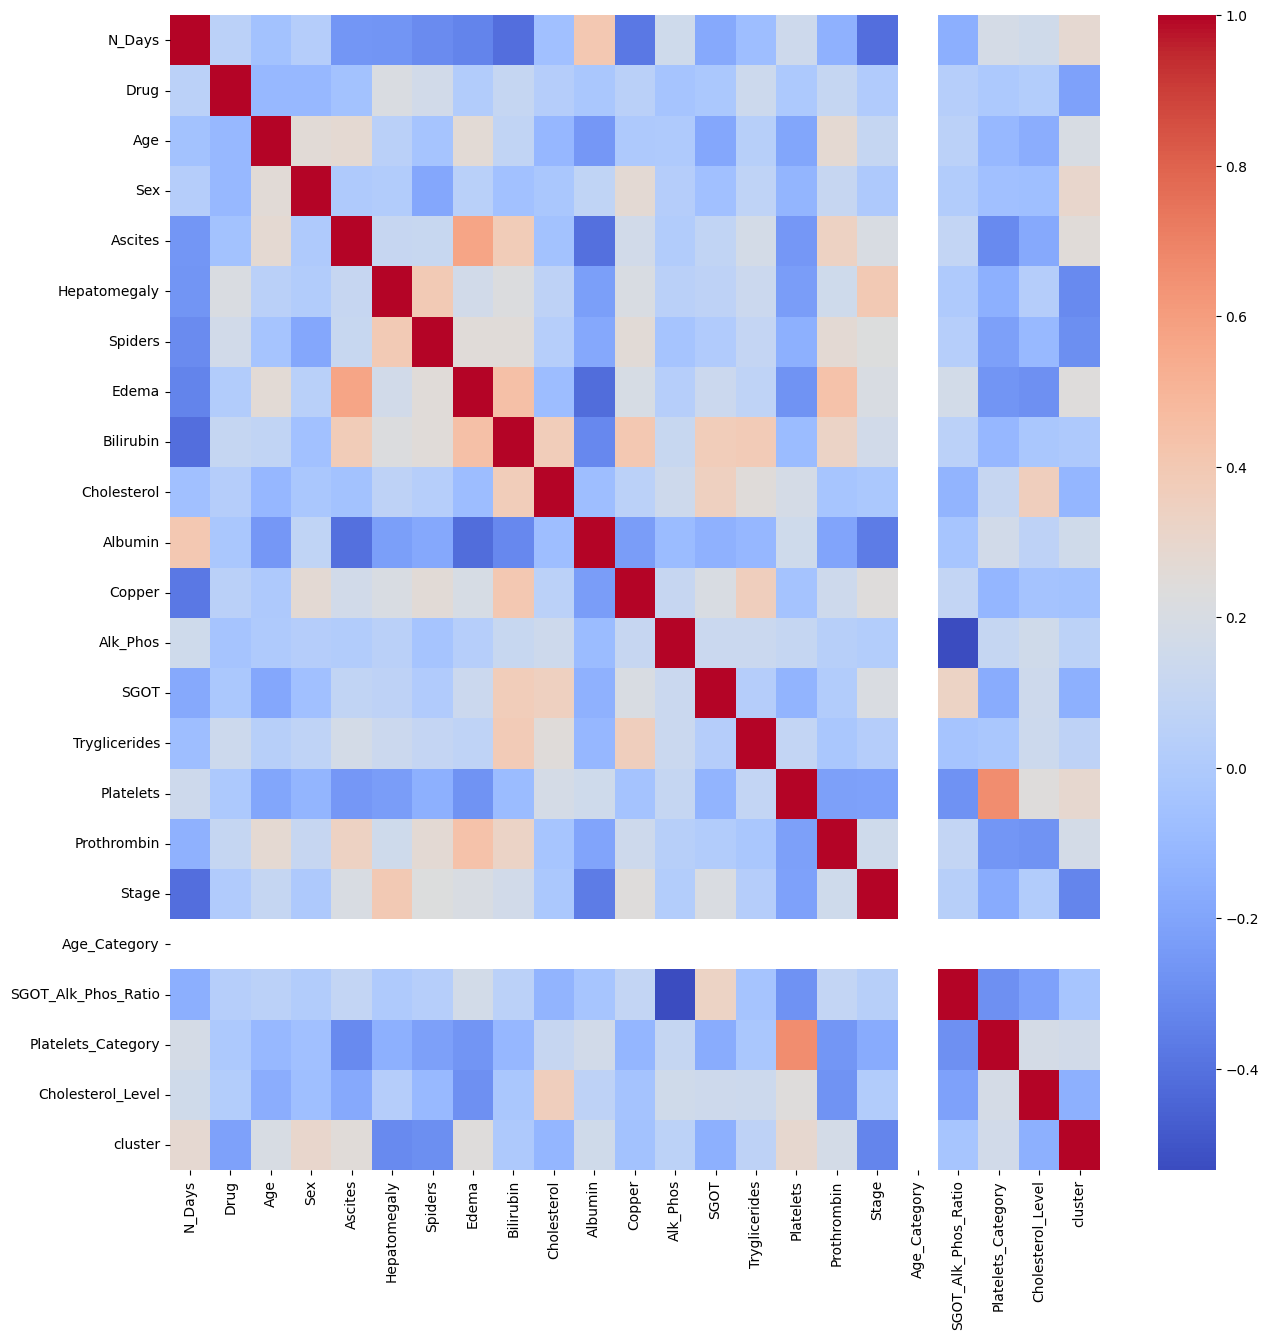

In [ ]:
# Make a correlation heatmap of all features
corr = X_train_sm.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,cmap='coolwarm');

In [ ]:
from collinearity import SelectNonCollinear
from sklearn.feature_selection import f_classif
# Instantiate the selector, indicate theshold for r, also include the appropriate scoring metric for the task
selector = SelectNonCollinear(correlation_threshold = 0.8, scoring = f_classif)
# Fit on the training data, use .values
selector.fit(X_train_sm.values, y_train_sm.values)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [18] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
# Define a mask for filtering
non_collinear = selector.get_support()
non_collinear[:5]

[True, True, True, True, True]

In [ ]:
# Check how many features are above the theshold ' to be droped '
non_collinear.count(False)

1

So only one Feature does not affect the model

In [ ]:
# Apply the mask to the training data
X_train_no_corr = X_train_sm.loc[:, non_collinear]

# Apply the mask to the testing data
X_test_no_corr = X_test_scaled.loc[:, non_collinear]

## Applying Knn after filtering

In [ ]:
Knn = KNeighborsClassifier(n_neighbors=3)
# Fit the KNN model to the new features
Knn.fit(X_train_no_corr, y_train_sm)

KNeighborsClassifier(n_neighbors=3)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86       119
         1.0       0.90      1.00      0.95       119
         2.0       0.91      0.84      0.87       119

    accuracy                           0.90       357
   macro avg       0.90      0.90      0.89       357
weighted avg       0.90      0.90      0.89       357



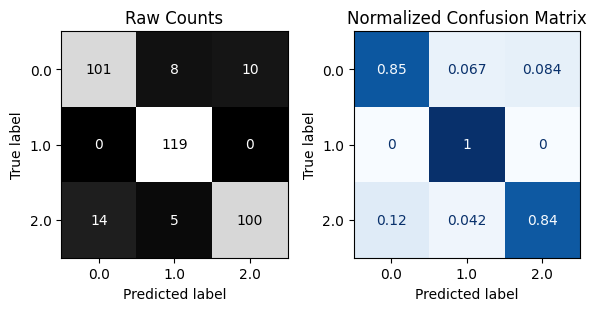


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81        50
         1.0       0.11      0.25      0.15         4
         2.0       0.67      0.56      0.61        25

    accuracy                           0.70        79
   macro avg       0.53      0.54      0.52        79
weighted avg       0.73      0.70      0.71        79



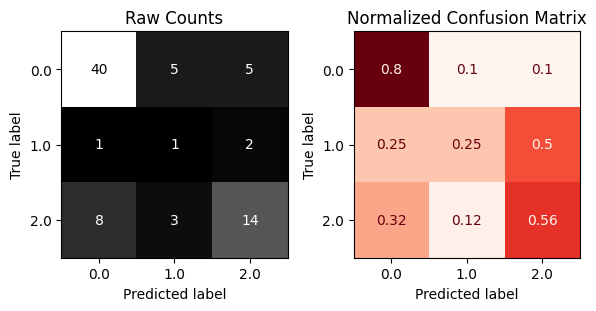

In [ ]:
# Evaluating Model
evaluate_classification(Knn, X_train_no_corr,y_train_sm, X_test_no_corr, y_test)

#Top 10 features using permutation importance

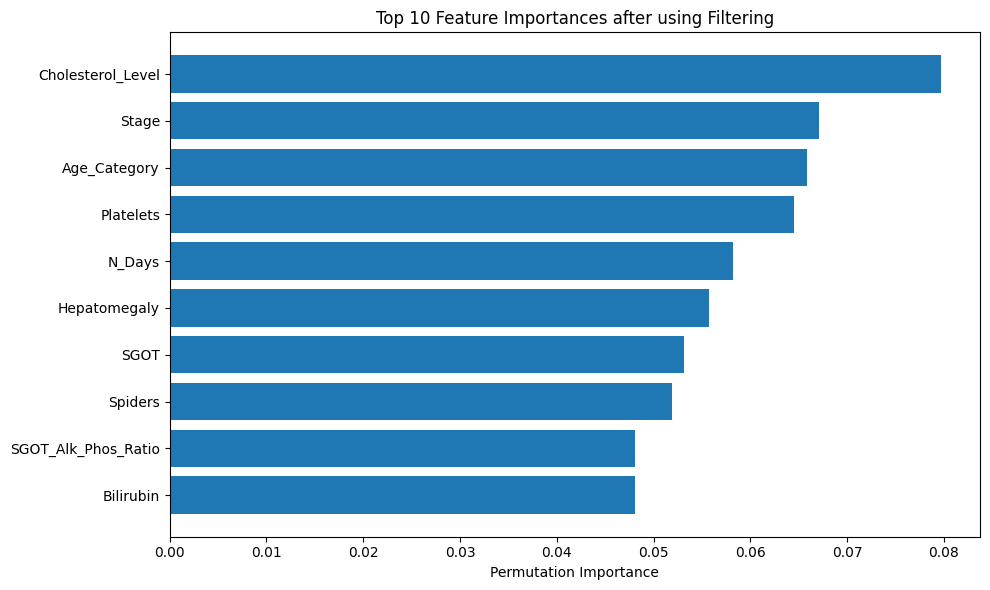

In [ ]:
# Extract and visualize the top 10 features using permutation importance
from sklearn.inspection import permutation_importance

result = permutation_importance(Knn, X_test_no_corr, y_test, n_repeats=10, random_state=42)

# Get feature importances and their indices
importances = result.importances_mean
indices = np.argsort(importances)

# Select the top 10 features
top_10_indices = indices[-10:]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances after using Filtering")
plt.barh(range(len(top_10_indices)), importances[top_10_indices], align="center")
plt.yticks(range(len(top_10_indices)), [X_test.columns[i] for i in top_10_indices])
plt.xlabel("Permutation Importance")
plt.tight_layout()
plt.show()

##  Top 10 Features comparasion

*The top feature before filtering was SGOT, but after filtering, Cholesterol_Level became the most important.*
Features Present in Both Cases

*   SGOT: Remains an important feature but drops in relative ranking after filtering.
*   N_Days and Hepatomegaly: Present in both cases, with similar rankings.


New Features After Engeneering and Filtering:

*   Cholesterol_Level, Stage, Age_Category, Platelets, Spiders, and SGOT_Alk_Phos_Ratio appear after filtering, indicating the effect of adding or transforming features through filtering.

Dropped Features After Filtering:

*   Prothrombin, Albumin, Copper, Alk_Phos, and Drug are no longer in the top 10 after filtering, suggesting they became less relevant in the updated dataset.



# ANN